In [177]:
# Download extra libraries
!pip install wordcloud


In [178]:
# import necessary modules
from IPython.display import Image
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt	
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Graph Functions

In [179]:
def word_cloud(col):
	"""
	Takes in dataframe and plots a wordclous using matplotlib
	"""
	plt.subplots(figsize = (12,10))
	wordcloud = WordCloud(
							background_color = 'white',
							width = 1000,
							height = 800).generate(" ".join(col))
	plt.imshow(wordcloud)
	plt.axis('off')
	plt.show()


In [180]:
def create_bar_chart(serie,y,x, name):
    dist_val = serie.value_counts()
    dist_val.plot(kind='bar', xlabel=x, ylabel=y,title=name)
    

In [181]:
def create_pie_chart(panda_frame, label, count, title):
    # Create a pie chart
    
    panda_frame.plot(kind='pie', y=count, labels=panda_frame[label], autopct='%1.1f%%',figsize=(12, 12))

    # Add title
    plt.title(title)

    # Show the chart
    plt.show()

# Analysis

In [182]:
# Load JSON file into a Pandas DataFrame
streaming = pd.read_json('StreamingHistory1.json')
search_queries = pd.read_json('SearchQueries.json')
streaming.head()

,endTime,artistName,trackName,msPlayed
0,2023-01-05 16:22,Anna Landström,To the Rain,141966
1,2023-01-05 16:25,Joy Meyer-Williams,Autumn Night,172896
2,2023-01-05 16:28,Jon Hopkins,Wintergreen,180531
3,2023-01-05 16:30,Igulfrid,Hideaway,146806
4,2023-01-05 16:32,Giovanna Petrini,Nascondiglio,116950


In [183]:
streaming.describe()

,msPlayed
count,3.372000e+03
mean,1.497198e+05
std,2.434860e+05
min,0.000000e+00
25%,9.306000e+03
50%,1.347610e+05
75%,1.910260e+05
max,5.078208e+06


In [184]:
search_queries.head()

,platform,searchTime,searchQuery,searchInteractionURIs
0,IPHONE_ARM64,2023-01-11T21:04:19.981Z[UTC],bla,[]
1,IPHONE_ARM64,2023-01-11T21:04:24.375Z[UTC],simply,[]
2,IPHONE_ARM64,2023-01-29T19:13:57.108Z[UTC],malo,[]
3,IPHONE_ARM64,2023-02-01T15:34:20.004Z[UTC],l’,[]
4,IPHONE,2023-02-01T15:34:21.141Z[UTC],l’appunt,[spotify:track:5PnEkOUOFnk0wMI71JwddQ]


In [185]:
search_queries.describe()

,platform,searchTime,searchQuery,searchInteractionURIs
count,40,40,40,40
unique,3,40,35,18
top,IPHONE,2023-01-11T21:04:19.981Z[UTC],i will survive,[]
freq,19,1,3,23


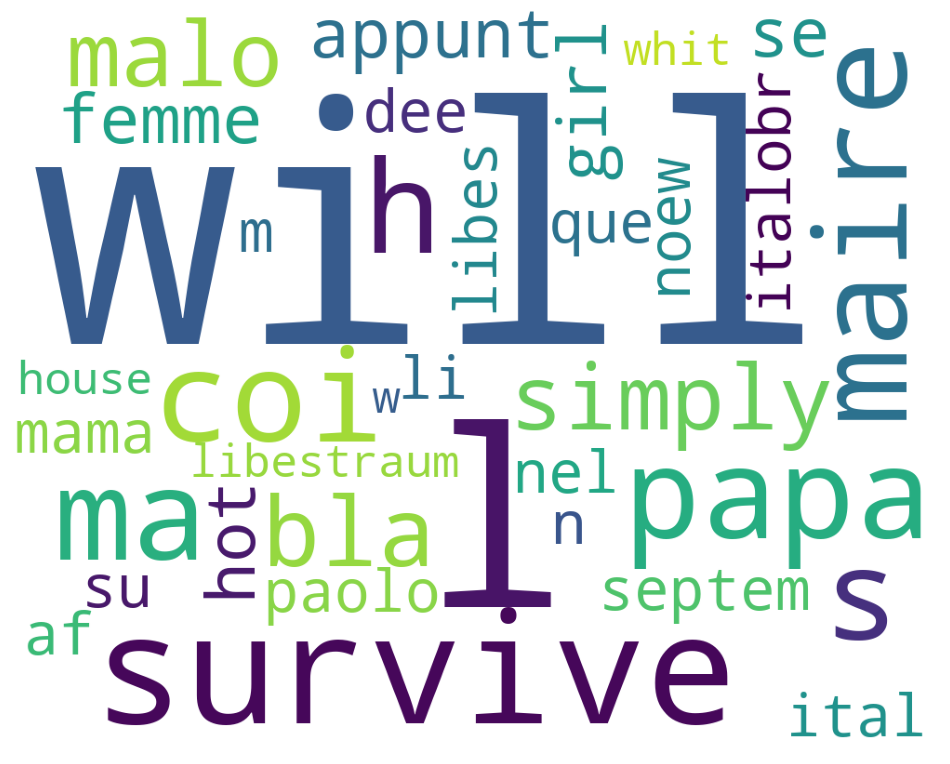

In [186]:
# display a frequency of words in world-cloud search history
word_cloud(search_queries['searchQuery'])

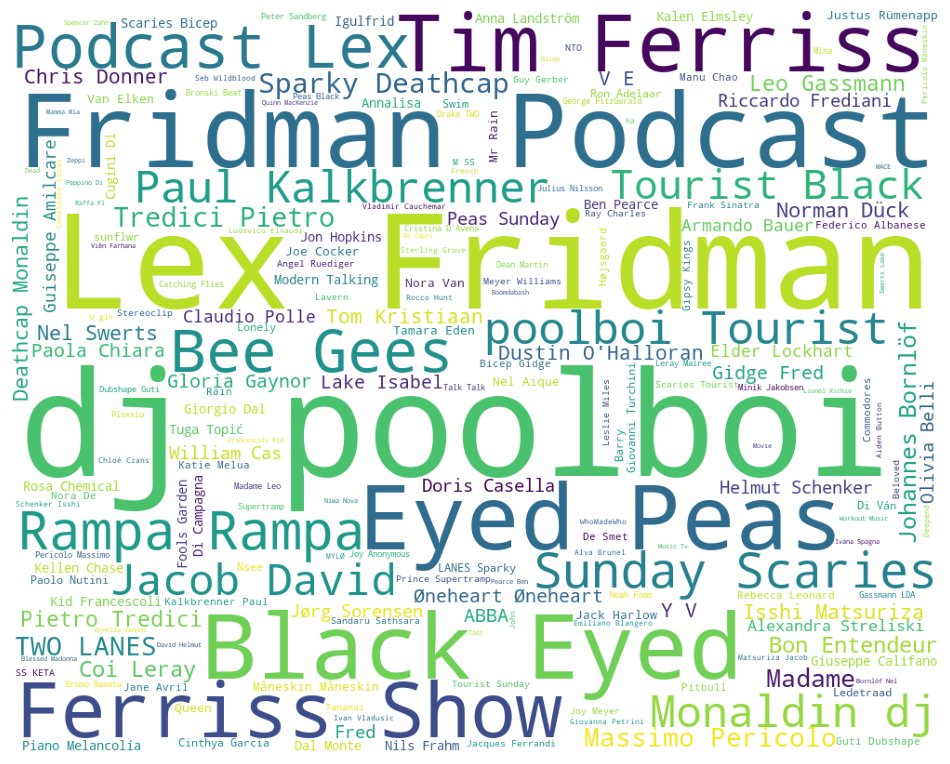

In [187]:
# display a frequency of words in world-cloud artist
word_cloud(streaming['artistName'])

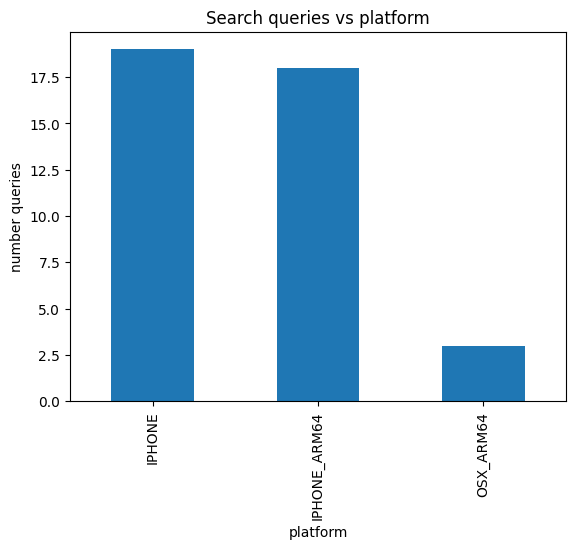

In [188]:
create_bar_chart(search_queries['platform'], "number queries", "platform", "Search queries vs platform")

/var/folders/dn/x_8ks55n46x692nkj1bx2rbw0000gn/T/ipykernel_447/159167177.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



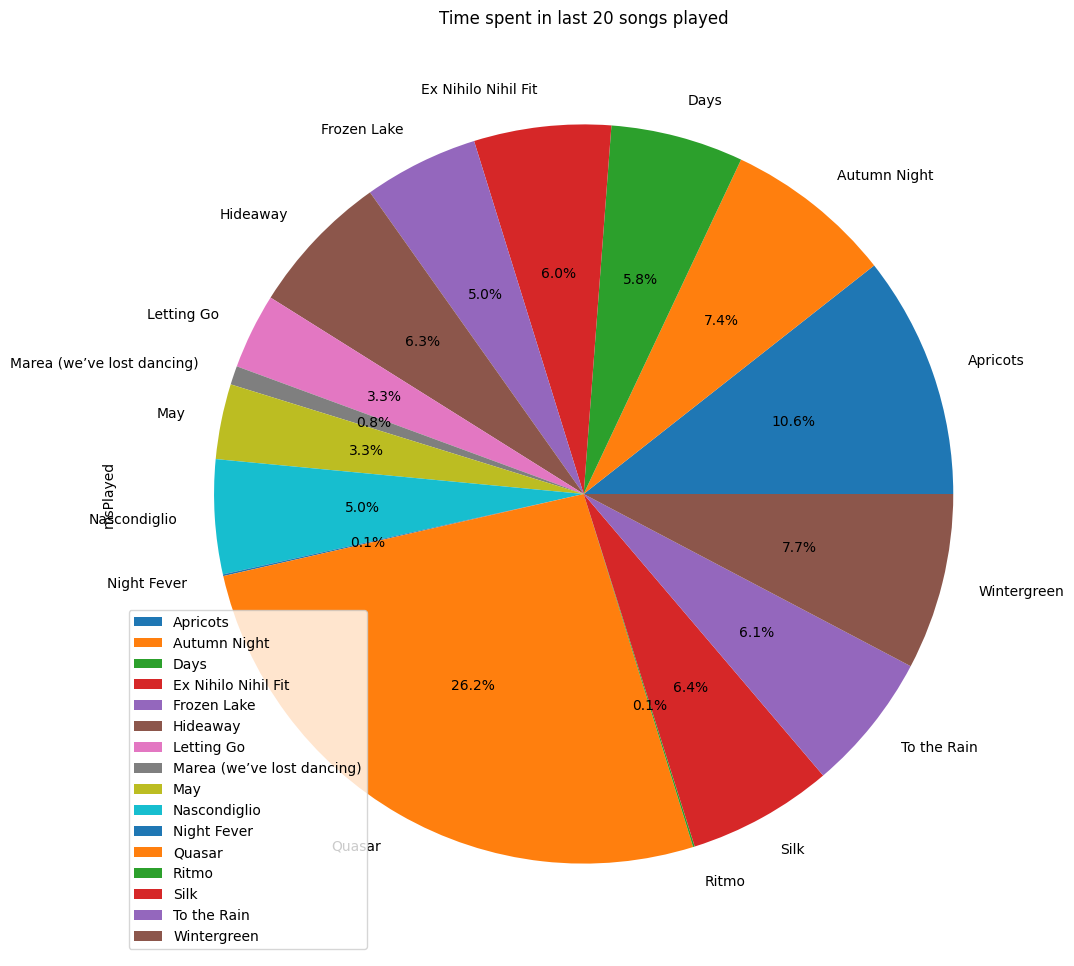

In [189]:
new_df = streaming.head(20).groupby('trackName').sum().reset_index()
create_pie_chart(new_df, 'trackName', 'msPlayed','Time spent in last 20 songs played')

/var/folders/dn/x_8ks55n46x692nkj1bx2rbw0000gn/T/ipykernel_447/222641512.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



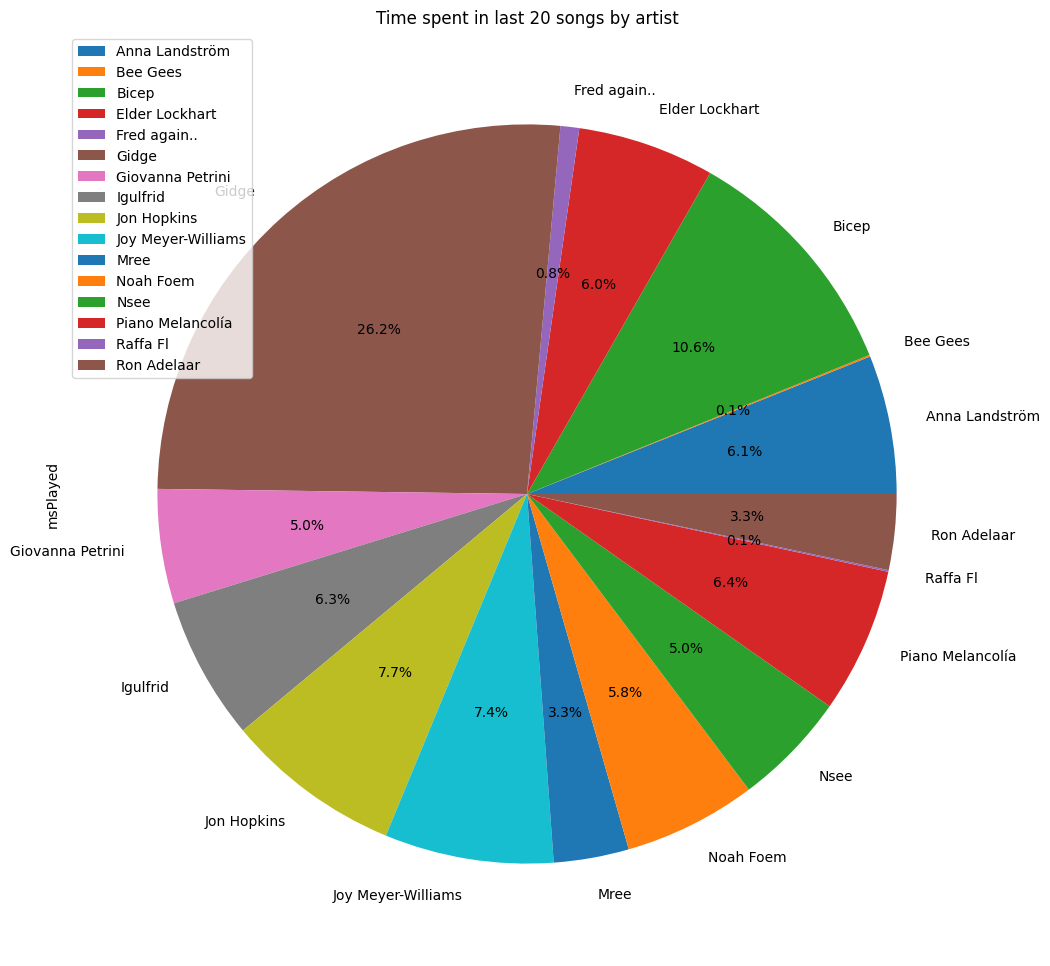

In [190]:
new_df = streaming.head(20).groupby('artistName').sum().reset_index()
create_pie_chart(new_df, 'artistName', 'msPlayed', 'Time spent in last 20 songs by artist')

# SPOTIFY API EXPLORATION


In [38]:
import requests

streaming.head(30)

,endTime,artistName,trackName,msPlayed
0,2023-01-05 16:22,Anna Landström,To the Rain,141966
1,2023-01-05 16:25,Joy Meyer-Williams,Autumn Night,172896
2,2023-01-05 16:28,Jon Hopkins,Wintergreen,180531
3,2023-01-05 16:30,Igulfrid,Hideaway,146806
4,2023-01-05 16:32,Giovanna Petrini,Nascondiglio,116950
5,2023-01-05 16:33,Mree,May,76937
6,2023-01-05 16:36,Piano Melancolía,Silk,148835
7,2023-01-05 16:38,Elder Lockhart,Ex Nihilo Nihil Fit,140151
8,2023-01-05 16:40,Nsee,Frozen Lake,117443
9,2023-01-05 16:42,Noah Foem,Days,135859


In [39]:
def spotify_search_track(track_name: str, access_token: str):
    request = requests.get('https://api.spotify.com/v1/search?q=' + track_name + '&type=track', headers={'Authorization': 'Bearer ' + access_token})
    return request.json()

In [40]:
def spotify_fetch_album(album_id: str, access_token: str):
    request = requests.get('https://api.spotify.com/v1/albums/' + album_id, headers={'Authorization': 'Bearer ' + access_token})
    return request.json()

In [102]:
#Exploration
access_token = "BQBkTe8IbXkx13mTFTvc1DPIFUI8hxy0Ya8_PaRxJxElDPTQOKE0_Geg3pwpobHRe16tGEcwD2Io7ws9rp0e4WqcBPTxo1-bVV-1uVVw2t4yFZKrxJ3v"
it = 0
def get_track_info(track_row):
    track_name = track_row["trackName"]
    req1 = spotify_search_track(track_name, access_token)
    #Check if we have a successful response
    if(req1 and 'tracks' in req1):
        tracks_results = req1['tracks']['items']
        first_result = tracks_results[0]
        id = first_result['id']
        track_info = {
            'id' : first_result['id'],
            'album_id': first_result['album']['id'],
            'album_name': first_result['album']['name'],
            'duration_ms' : first_result['duration_ms'],
            'popularity' : first_result['popularity'],
            'track_name': first_result['name'],
            'artists': list(map(lambda x: x['name'], first_result['artists'])),
            'msPlayed': track_row['msPlayed'],
            'endTime': track_row['endTime']
        }

        #Second API request for more information about the album (release date, genres)
        req2 = spotify_fetch_album(track_info['album_id'], access_token)
        if(req2):
            track_info['release_date'] = req2['release_date']
            track_info['genres'] = req2['genres']
            return pd.Series(track_info)
        




# Let's get the data for the Data frame then :)

In [101]:
streaming.head()

,endTime,artistName,trackName,msPlayed
0,2023-01-05 16:22,Anna Landström,To the Rain,141966
1,2023-01-05 16:25,Joy Meyer-Williams,Autumn Night,172896
2,2023-01-05 16:28,Jon Hopkins,Wintergreen,180531
3,2023-01-05 16:30,Igulfrid,Hideaway,146806
4,2023-01-05 16:32,Giovanna Petrini,Nascondiglio,116950


In [103]:
# nb = len(streaming)
df = streaming.head(5)
df = df.apply(get_track_info, axis=1)
print("Result df: ", df)
df.to_csv(str(nb)+"-results.csv")


Result df:  0    None
1    None
2    None
3    None
4    None
dtype: object


In [4]:
!pip install spotipy --upgrade

In [79]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# replace with your own client ID and client secret from the Spotify Developer Dashboard
with open("secrets.txt") as file:
    client_id = file.readline()
    client_secret = file.readline()

# load the CSV file into a pandas DataFrame
results = pd.read_csv('merged-res.csv')
results.head()


,Unnamed: 0,id,album_id,album_name,duration_ms,popularity,track_name,artists,msPlayed,endTime,release_date,genres
0,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620.0,59.0,To the Rain,['Anna Landström'],141966.0,2023-01-05 16:22,2022-05-20,[]
1,1,5eMUmyDeH1aayf1uZ0Wrga,2EqOuPPTOth7VS70I1kvta,Reflect the Day,65142.0,48.0,Autumn Nights,"['Slowberry', 'Fuzzy & Glad', 'blushful']",172896.0,2023-01-05 16:25,2020-10-05,[]
2,2,7EL9YtzL4qYOcxYlf4mbVi,2zXp7huP6HGVldywEC6arL,Yours to Break,211826.0,52.0,Wintergreen,['The East Pointers'],180531.0,2023-01-05 16:28,2019-10-25,[]
3,3,2HwCcCi8Up9NECNBRt0yTV,1Vhx6ow2PDJROoX3ND5dEy,Hideaway,148906.0,63.0,Hideaway,['Igulfrid'],146806.0,2023-01-05 16:30,2022-04-15,[]
4,4,763DOeT2XIrzMjbC3LLF5i,4TVVWsBh3tY8GXupSSoCc4,Lydian Fairytale,105786.0,67.0,Lydian Fairytale,['Nascondiglio'],116950.0,2023-01-05 16:32,2022-12-30,[]


In [88]:
import math
data_retrieved = []
for track_id in results['id']:
    # set up authentication for the Spotify API
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    print(track_id)
    if(track_id == track_id):
        print(track_id)

    # make the request to the Spotify API to get the audio features for the track
        audio_features = sp.audio_features(track_id)
        data_retrieved.append(audio_features[0])

frame_audio_features = pd.DataFrame(data_retrieved)
frame_audio_features.head()

025aQi6Ffw676y8m4zLPk7
025aQi6Ffw676y8m4zLPk7
5eMUmyDeH1aayf1uZ0Wrga
5eMUmyDeH1aayf1uZ0Wrga
7EL9YtzL4qYOcxYlf4mbVi
7EL9YtzL4qYOcxYlf4mbVi
2HwCcCi8Up9NECNBRt0yTV
2HwCcCi8Up9NECNBRt0yTV
763DOeT2XIrzMjbC3LLF5i
763DOeT2XIrzMjbC3LLF5i
2BHj31ufdEqVK5CkYDp9mA
2BHj31ufdEqVK5CkYDp9mA
2kEk2uIKtoJD5r65cH7XBP
2kEk2uIKtoJD5r65cH7XBP
3iyH2B4dcjufYE0ZjiUZsC
3iyH2B4dcjufYE0ZjiUZsC
0acEauszFAvCGw9cNF0kZM
0acEauszFAvCGw9cNF0kZM
4FhxN8PTyjkBVfwlCnr9Om
4FhxN8PTyjkBVfwlCnr9Om
2aLgFG14lYLiV8YYziZI7Q
2aLgFG14lYLiV8YYziZI7Q
6cy3ki60hLwimwIje7tALf
6cy3ki60hLwimwIje7tALf
0WfOuXw05LJq4ik1lVvTzi
0WfOuXw05LJq4ik1lVvTzi
6nqq13r13sPOS7C3ydOi7L
6nqq13r13sPOS7C3ydOi7L
6nqq13r13sPOS7C3ydOi7L
6nqq13r13sPOS7C3ydOi7L
5Z8Dj3LtbyCMiwE86rhg2f
5Z8Dj3LtbyCMiwE86rhg2f
5Z8Dj3LtbyCMiwE86rhg2f
5Z8Dj3LtbyCMiwE86rhg2f
0qemIQjSxcKyf42VPfZnfa
0qemIQjSxcKyf42VPfZnfa
0WfOuXw05LJq4ik1lVvTzi
0WfOuXw05LJq4ik1lVvTzi
6nqq13r13sPOS7C3ydOi7L
6nqq13r13sPOS7C3ydOi7L
3y3GMygxjeZ8VQDfEoyKh7
3y3GMygxjeZ8VQDfEoyKh7
7Jrx30VldPaujIaP3c2SJn
7Jrx30VldPa

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.464,0.06390,4,-26.028,0,0.0385,0.992,0.927000,0.0829,0.317,111.993,audio_features,025aQi6Ffw676y8m4zLPk7,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
1,0.780,0.00315,2,-32.727,0,0.3460,0.996,0.973000,0.1020,0.000,70.036,audio_features,5eMUmyDeH1aayf1uZ0Wrga,spotify:track:5eMUmyDeH1aayf1uZ0Wrga,https://api.spotify.com/v1/tracks/5eMUmyDeH1aa...,https://api.spotify.com/v1/audio-analysis/5eMU...,65143,4
2,0.560,0.73700,11,-7.655,1,0.0550,0.308,0.000005,0.0745,0.395,184.286,audio_features,7EL9YtzL4qYOcxYlf4mbVi,spotify:track:7EL9YtzL4qYOcxYlf4mbVi,https://api.spotify.com/v1/tracks/7EL9YtzL4qYO...,https://api.spotify.com/v1/audio-analysis/7EL9...,211827,3
3,0.356,0.01860,9,-26.729,1,0.0420,0.991,0.929000,0.0996,0.154,84.753,audio_features,2HwCcCi8Up9NECNBRt0yTV,spotify:track:2HwCcCi8Up9NECNBRt0yTV,https://api.spotify.com/v1/tracks/2HwCcCi8Up9N...,https://api.spotify.com/v1/audio-analysis/2HwC...,148907,4
4,0.428,0.02530,1,-29.558,1,0.0388,0.991,0.912000,0.1170,0.175,70.853,audio_features,763DOeT2XIrzMjbC3LLF5i,spotify:track:763DOeT2XIrzMjbC3LLF5i,https://api.spotify.com/v1/tracks/763DOeT2XIrz...,https://api.spotify.com/v1/audio-analysis/763D...,105787,4


In [89]:
#merge both datasets
merged_extra_info = pd.merge(results, frame_audio_features, on='id')
merged_extra_info.head()

,Unnamed: 0,id,album_id,album_name,duration_ms_x,popularity,track_name,artists,msPlayed,endTime,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms_y,time_signature
0,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620.0,59.0,To the Rain,['Anna Landström'],141966.0,2023-01-05 16:22,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
1,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620.0,59.0,To the Rain,['Anna Landström'],141966.0,2023-01-05 16:22,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
2,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620.0,59.0,To the Rain,['Anna Landström'],141966.0,2023-01-05 16:22,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
3,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620.0,59.0,To the Rain,['Anna Landström'],141966.0,2023-01-05 16:22,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
4,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620.0,59.0,To the Rain,['Anna Landström'],141966.0,2023-01-05 16:22,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4


In [122]:
merged_extra_info.to_csv("extra_info.csv")

In [135]:
#load data extra info and clean data
results = pd.read_csv('extra_info.csv')
results.head()

,Unnamed: 0.1,Unnamed: 0,id,album_id,album_name,duration_ms_x,popularity,track_name,artists,msPlayed,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms_y,time_signature
0,0,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620.0,59.0,To the Rain,['Anna Landström'],141966.0,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
1,1,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620.0,59.0,To the Rain,['Anna Landström'],141966.0,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
2,2,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620.0,59.0,To the Rain,['Anna Landström'],141966.0,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
3,3,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620.0,59.0,To the Rain,['Anna Landström'],141966.0,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
4,4,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620.0,59.0,To the Rain,['Anna Landström'],141966.0,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4


In [121]:
drop_columns = ["Unnamed: 0.1","Unnamed: 0","uri", "track_href", "analysis_url", "duration_ms_y", "type","duration_ms_x"]
extra_results = results.drop(drop_columns , axis=1)

extra_results['endTime'] = pd.to_datetime(extra_results['endTime'])
extra_results['endTime'] = extra_results['endTime'].dt.strftime('%Y-%m-%d')

extra_results.describe()

,popularity,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,55.965461,165355.734294,0.486375,0.262508,5.570302,-20.853534,0.572478,0.063788,0.679304,0.721258,0.123794,0.235052,112.165120,3.711450
std,14.031701,101584.524899,0.192118,0.300805,3.552156,9.971354,0.494786,0.068281,0.393911,0.357953,0.077171,0.198654,27.107941,0.649526
min,0.000000,70.000000,0.130000,0.000860,0.000000,-38.342000,0.000000,0.024800,0.000033,0.000000,0.026500,0.000000,52.158000,1.000000
25%,50.000000,119248.000000,0.319000,0.025000,2.000000,-28.755000,0.000000,0.037100,0.288000,0.801000,0.094700,0.092200,89.040000,3.000000
50%,59.000000,146372.000000,0.441000,0.063100,5.000000,-26.028000,1.000000,0.045600,0.973000,0.913000,0.109000,0.159000,117.002000,4.000000
75%,63.000000,195503.000000,0.642000,0.491000,8.000000,-11.674000,1.000000,0.057700,0.993000,0.941000,0.115000,0.318000,128.537000,4.000000
max,94.000000,469995.000000,0.964000,0.974000,11.000000,-2.410000,1.000000,0.421000,0.996000,0.974000,0.712000,0.973000,206.686000,5.000000


In [9]:
grouped = extra_results.groupby('endTime').sum()
# grouped_normalised = grouped / grouped.sum()
grouped_normalised = grouped
grouped_normalised.head()

/var/folders/dn/x_8ks55n46x692nkj1bx2rbw0000gn/T/ipykernel_447/2218286013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = extra_results.groupby('endTime').sum()


,popularity,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
endTime,,,,,,,,,,,,,,
2023-01-05,1445,3286151,10.934,5.09345,176,-550.709,17,1.3645,19.287400,17.410903,2.6293,5.5278,2712.731,93
2023-01-06,24264,71443260,208.890,119.25274,2378,-8522.907,248,25.1248,280.599353,300.977277,59.9961,108.6815,47721.817,1609
2023-01-07,6029,13731838,45.486,23.91368,569,-2267.779,42,6.6055,75.765900,74.734488,11.9865,27.4054,12231.824,390


<Axes: title={'center': 'Your sentiment in the last days'}, xlabel='endTime', ylabel='happines value'>

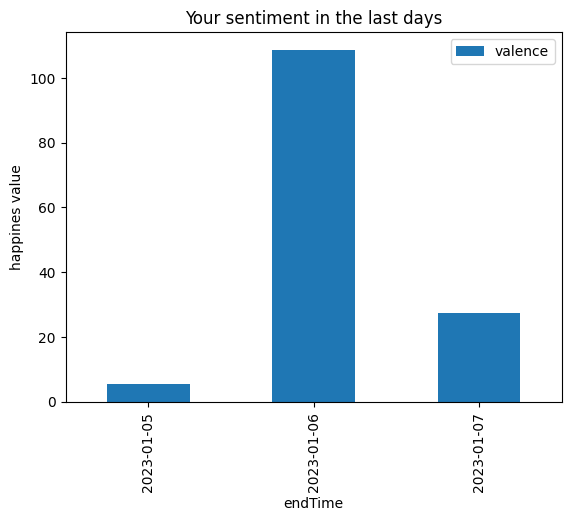

In [10]:
grouped_normalised.plot(kind='bar',y=["valence"],ylabel="happines value", title="Your sentiment in the last days")

<Axes: xlabel='popularity', ylabel='msPlayed'>

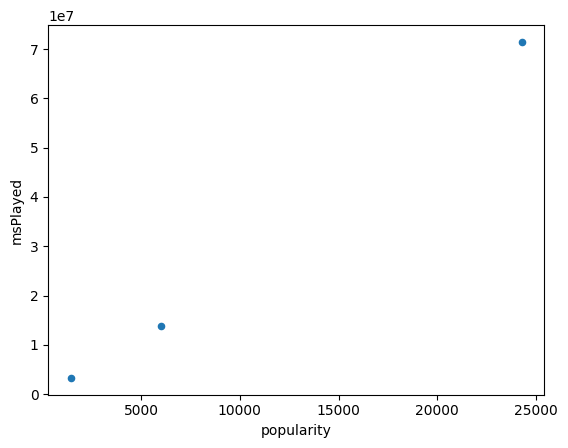

In [169]:
grouped_normalised.plot(kind='scatter', x='popularity', y='msPlayed')


In [172]:
import plotly.express as px
import calendar

df = results.copy()
print(df['endTime'])
df['endTime'] = df['endTime'].apply(lambda x: x.split(" ")[0])
df['endTime'] = pd.to_datetime(df['endTime'])
print(df['endTime'])
df = df.set_index('endTime')
df = df.groupby(pd.Grouper(freq='d')).mean()
df['endTime'] = df.index
df['endTime_str'] = df['endTime'].apply(lambda x: calendar.day_name[x.weekday()])
df = df.groupby(['endTime_str']).mean()

print(df)

df['endTime_str'] = df.index


fig = px.line_polar(df, r='valence', theta='endTime_str', line_close=True, labels=["valence, endTime"])
fig.update_layout(showlegend=True, template="plotly_dark", title="Mean valence by weekday")
fig.show()



0       2023-01-05 16:22
1       2023-01-05 16:22
2       2023-01-05 16:22
3       2023-01-05 16:22
4       2023-01-05 16:22
              ...       
3672    2023-01-14 10:17
3673    2023-01-14 10:20
3674    2023-01-14 10:20
3675    2023-01-14 16:04
3676    2023-01-14 16:18
Name: endTime, Length: 3677, dtype: object
0      2023-01-05
1      2023-01-05
2      2023-01-05
3      2023-01-05
4      2023-01-05
          ...    
3672   2023-01-14
3673   2023-01-14
3674   2023-01-14
3675   2023-01-14
3676   2023-01-14
Name: endTime, Length: 3677, dtype: datetime64[ns]
             Unnamed: 0.1  Unnamed: 0  duration_ms_x  popularity  \
endTime_str                                                        
Friday        2396.027485  292.288153  264334.947564   57.472642   
Monday        1721.916382  315.496587  190938.465870   53.936860   
Saturday      1557.058330  408.353302  187797.792988   56.526911   
Sunday        3327.000000  272.000000  244360.000000   92.000000   
Thursday       145.649123

/var/folders/dn/x_8ks55n46x692nkj1bx2rbw0000gn/T/ipykernel_447/1655239315.py:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/dn/x_8ks55n46x692nkj1bx2rbw0000gn/T/ipykernel_447/1655239315.py:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/Users/markmouawad/miniconda3/envs/artistScraping/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [173]:
import plotly.express as px
import calendar

df = results.copy()
print(df['endTime'])
df['endTime'] = df['endTime'].apply(lambda x: x.split(" ")[0])
df['endTime'] = pd.to_datetime(df['endTime'])
print(df['endTime'])
df = df.set_index('endTime')
df = df.groupby(pd.Grouper(freq='d')).mean()
df['endTime'] = df.index
df['endTime_str'] = df['endTime'].apply(lambda x: calendar.day_name[x.weekday()])
df = df.groupby(['endTime_str']).mean()

print(df)

df['endTime_str'] = df.index


fig = px.line_polar(df, r='energy', theta='endTime_str', line_close=True, labels=["energy, endTime"], template="plotly_dark",)
fig.update_layout(showlegend=True, title="Mean track energy by weekday")
fig.show()


0       2023-01-05 16:22
1       2023-01-05 16:22
2       2023-01-05 16:22
3       2023-01-05 16:22
4       2023-01-05 16:22
              ...       
3672    2023-01-14 10:17
3673    2023-01-14 10:20
3674    2023-01-14 10:20
3675    2023-01-14 16:04
3676    2023-01-14 16:18
Name: endTime, Length: 3677, dtype: object
0      2023-01-05
1      2023-01-05
2      2023-01-05
3      2023-01-05
4      2023-01-05
          ...    
3672   2023-01-14
3673   2023-01-14
3674   2023-01-14
3675   2023-01-14
3676   2023-01-14
Name: endTime, Length: 3677, dtype: datetime64[ns]
             Unnamed: 0.1  Unnamed: 0  duration_ms_x  popularity  \
endTime_str                                                        
Friday        2396.027485  292.288153  264334.947564   57.472642   
Monday        1721.916382  315.496587  190938.465870   53.936860   
Saturday      1557.058330  408.353302  187797.792988   56.526911   
Sunday        3327.000000  272.000000  244360.000000   92.000000   
Thursday       145.649123

/var/folders/dn/x_8ks55n46x692nkj1bx2rbw0000gn/T/ipykernel_447/394823026.py:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/dn/x_8ks55n46x692nkj1bx2rbw0000gn/T/ipykernel_447/394823026.py:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/Users/markmouawad/miniconda3/envs/artistScraping/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [175]:
import plotly.express as px
df = results.copy()
print(df['endTime'])
df['endTime'] = df['endTime'].apply(lambda x: x.split(" ")[0])
df['endTime'] = pd.to_datetime(df['endTime'])
df = df.set_index('endTime')
df = df.groupby(pd.Grouper(freq='d')).mean()
df = df.interpolate()
fig = px.line(df, x=df.index, y="danceability", title='Danceability through time')
fig.show()

0       2023-01-05 16:22
1       2023-01-05 16:22
2       2023-01-05 16:22
3       2023-01-05 16:22
4       2023-01-05 16:22
              ...       
3672    2023-01-14 10:17
3673    2023-01-14 10:20
3674    2023-01-14 10:20
3675    2023-01-14 16:04
3676    2023-01-14 16:18
Name: endTime, Length: 3677, dtype: object


/var/folders/dn/x_8ks55n46x692nkj1bx2rbw0000gn/T/ipykernel_447/3864574715.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

